In [1]:
# import tools
    
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import datetime as dt

In [2]:
# import and sort data

cnx = sqlite3.connect('C:\\Users\\mitch\\OneDrive\\Documents\\Metis Projects\\Retrieve_MTA_Data\\mta_data.db')
df = pd.read_sql_query("SELECT * FROM mta_data", cnx)

In [3]:
# clean & add new columns

df.columns = [column.strip() for column in df.columns]
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")
df["DATE_T"] = pd.to_datetime(df.DATE, format="%m/%d/%Y")
df['DAY_OF_WEEK'] = df.DATE_TIME.dt.dayofweek
# df['MONTH'] = df.DATE_TIME.dt.month

In [4]:
# clean and sort values

df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
drop = ['LINENAME', 'DIVISION', 'DESC']
df = df.drop(columns = drop)

In [5]:
# function definitions for counting entries/exits
# used from MTA Exercises

def get_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

def get_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter

In [6]:
# df_winter = df[(df.MONTH >= 1) & (df.MONTH < 4)]
# df_spring = df[(df.MONTH >= 4) & (df.MONTH < 7)]
# df_summer = df[(df.MONTH >= 7) & (df.MONTH < 10)]
# df_autumn = df[(df.MONTH >= 10) & (df.MONTH <= 12)]

In [7]:
# make new dataframes and groupby turnstile

ts_daily_entries = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())
ts_daily_exits = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).EXITS.first())

ts_daily_ent = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_T"],as_index=False).ENTRIES.first())
ts_daily_ex = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_T"],as_index=False).EXITS.first())

In [8]:
# make new columns for previous entries/exits

ts_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
ts_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (ts_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))
# make new columns for previous entries/exits

ts_daily_ent[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily_ent
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_T", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
ts_daily_ex[["PREV_DATE", "PREV_EXITS"]] = (ts_daily_ex
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_T", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4286294161.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily_entries
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4286294161.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (ts_daily_exits
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4286294161.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_daily_ent[["PREV_DATE", "PREV_ENTRIES"]] = (ts_daily_ent
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4286294161.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts_daily_ex[["PREV_DATE", "PREV_

In [9]:
# drop NaN values

ts_daily_entries = ts_daily_entries.dropna()
ts_daily_exits = ts_daily_exits.dropna()

ts_daily_ent = ts_daily_ent.dropna()
ts_daily_ex = ts_daily_ex.dropna()

In [10]:
# apply functions and set values to new column

ts_daily_entries['DAILY_ENTRIES'] = ts_daily_entries.apply(get_entries, axis=1, max_counter=1000000)
ts_daily_exits['DAILY_EXITS'] = ts_daily_exits.apply(get_exits, axis=1, max_counter=1000000)

ts_daily_ent['DAILY_ENTRIES'] = ts_daily_ent.apply(get_entries, axis=1, max_counter=1000000)
ts_daily_ex['DAILY_EXITS'] = ts_daily_ex.apply(get_exits, axis=1, max_counter=1000000)

238 6641395.0
6612907 123760.0
52806 17116894.0
17109949 166678.0
3082 1390173.0
1387887 96066.0
50 5264647.0
5240712 22160.0
18 4340953.0
4319382 21659.0
117 11715665.0
11675657 237421.0
198 5102094.0
5097487 126065.0
738 18398229.0
18244337 509945.0
327680 185586773.0
185582333 292954.0
6 5597786.0
5552756 860.0
233 1951349.0
1922624 5795.0
169 2172444.0
2170809 88928.0
3039842 73028.0
43 3039842.0
14 1028362.0
1021429 20940.0
25 1400020.0
1397677 3129.0
127 1657032.0
1650304 83807.0
327680 756269765.0
756204782 144965.0
262152 553649999.0
553649927 762.0
262152 229572623.0
229572623 262152.0
353 8049630.0
7883237 148942.0
0 5309746.0
5309736 199.0
80 1640812.0
3472083 42650.0
128 1458351.0
1388344 16571.0
327834 2642486.0
2620914 575951.0
101 2651127.0
2640146 52474.0
104 17275602.0
17253837 41742.0
16796392 123975.0
123940 16798085.0
453044031 1779426.0
24 453053819.0
1779111 2045.0
1562967890 113672.0
48740 1562963009.0
167790157 702266.0
643771 167827245.0
63 9631506.0
9485741 25

In [11]:
# create DAY_OF_WEEK column

ts_daily_ent['DAY_OF_WEEK'] = ts_daily_ent.DATE_T.dt.dayofweek
ts_daily_ex['DAY_OF_WEEK'] = ts_daily_ex.DATE_T.dt.dayofweek

In [12]:
# new groupby for entry and exit dataframes

ts_daily_entries2 = ts_daily_entries.groupby('STATION', as_index=False).DAILY_ENTRIES.sum()
ts_daily_exits2 = ts_daily_exits.groupby('STATION', as_index=False).DAILY_EXITS.sum()

ts_daily_ent2 = ts_daily_ent.groupby(['STATION', 'DAY_OF_WEEK'], as_index=False).DAILY_ENTRIES.sum()
ts_daily_ex2 = ts_daily_ex.groupby(['STATION', 'DAY_OF_WEEK'], as_index=False).DAILY_EXITS.sum()

In [13]:
# merge them into one dataframe

ts_daily_total = pd.merge(ts_daily_entries2, ts_daily_exits2, on = ["STATION"])
ts_daily_tot = pd.merge(ts_daily_ent2, ts_daily_ex2, on = ["STATION", "DAY_OF_WEEK"])

In [14]:
# get daily traffic totals

ts_daily_total['DAILY_TRAFFIC'] = ts_daily_total['DAILY_ENTRIES'] + ts_daily_total['DAILY_EXITS']
ts_daily_tot['DAILY_TRAFFIC'] = ts_daily_tot['DAILY_ENTRIES'] + ts_daily_tot['DAILY_EXITS']

In [15]:
# sort traffic descending

ts_daily_total = ts_daily_total.sort_values('DAILY_TRAFFIC', ascending = False)
ts_daily_tot = ts_daily_tot.sort_values('DAILY_TRAFFIC', ascending = False)

In [16]:
# divide daily traffic by 365 to get it to approximate a day

ts_daily_total.DAILY_TRAFFIC = ts_daily_total.DAILY_TRAFFIC.apply(lambda x: x/365.24)
ts_daily_tot.DAILY_TRAFFIC = ts_daily_tot.DAILY_TRAFFIC.apply(lambda x: x/365.24)

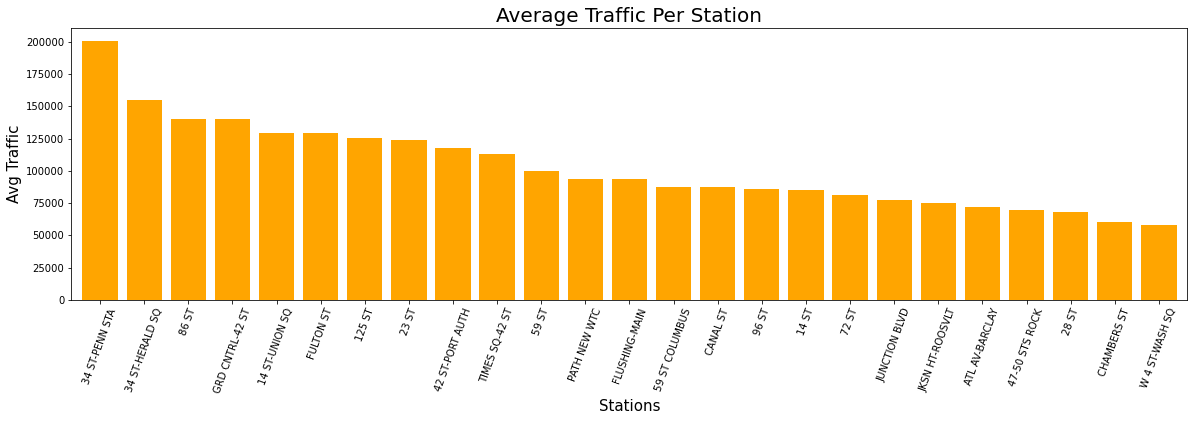

In [17]:
# Plot the top 25
top_25 = ts_daily_total.head(25)

plt.figure(figsize = (20, 5))
plt.bar(top_25.STATION, top_25.DAILY_TRAFFIC, color = 'orange')
plt.title('Average Traffic Per Station', fontsize=20, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 70)
plt.margins(x=0.01)
plt.ylabel('Avg Traffic', fontsize=15);

In [18]:
# masks for days of the week
mon_mask = ts_daily_tot.DAY_OF_WEEK == 0
tue_mask = ts_daily_tot.DAY_OF_WEEK == 1
wed_mask = ts_daily_tot.DAY_OF_WEEK == 2
thu_mask = ts_daily_tot.DAY_OF_WEEK == 3
fri_mask = ts_daily_tot.DAY_OF_WEEK == 4
sat_mask = ts_daily_tot.DAY_OF_WEEK == 5
sun_mask = ts_daily_tot.DAY_OF_WEEK == 6

In [19]:
# assign dataframes per days of the week
mondays = ts_daily_tot[mon_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()
tuesdays = ts_daily_tot[tue_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()
wednesdays = ts_daily_tot[wed_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()
thursdays = ts_daily_tot[thu_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()
fridays = ts_daily_tot[fri_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()
saturdays = ts_daily_tot[sat_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()
sundays = ts_daily_tot[sun_mask].groupby('STATION').DAILY_TRAFFIC.mean().reset_index()

In [20]:
# sort and set for top five stations per day
mondays = mondays.sort_values('DAILY_TRAFFIC', ascending = False)
mon_top5 = mondays.head()
tuesdays = tuesdays.sort_values('DAILY_TRAFFIC', ascending = False)
tue_top5 = tuesdays.head()
wednesdays = wednesdays.sort_values('DAILY_TRAFFIC', ascending = False)
wed_top5 = wednesdays.head()
thursdays = thursdays.sort_values('DAILY_TRAFFIC', ascending = False)
thu_top5 = thursdays.head()
fridays = fridays.sort_values('DAILY_TRAFFIC', ascending = False)
fri_top5 = fridays.head()
saturdays = saturdays.sort_values('DAILY_TRAFFIC', ascending = False)
sat_top5 = saturdays.head()
sundays = sundays.sort_values('DAILY_TRAFFIC', ascending = False)
sun_top5 = sundays.head()

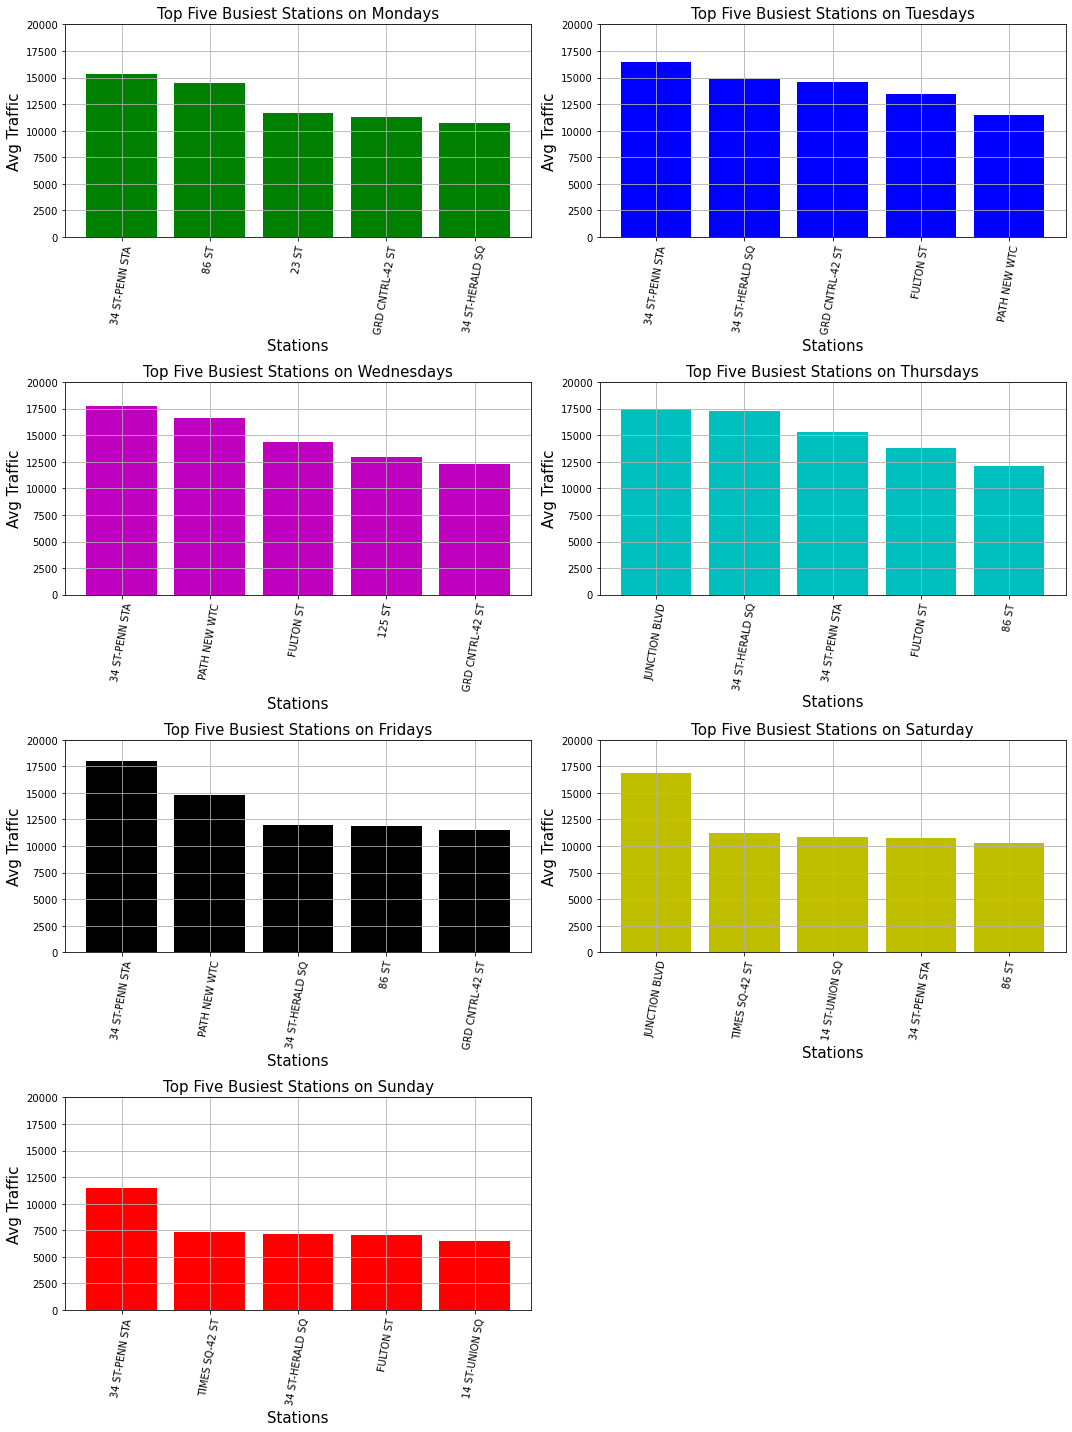

In [21]:
# plot graphs for each day of the week
plt.figure(figsize = (15, 20))

ylimit = 20000

mon = plt.subplot(4, 2, 1)
plt.bar(mon_top5.STATION, mon_top5.DAILY_TRAFFIC, color = 'g')
plt.title('Top Five Busiest Stations on Mondays', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

tue = plt.subplot(4, 2, 2)
plt.bar(tue_top5.STATION, tue_top5.DAILY_TRAFFIC, color = 'b')
plt.title('Top Five Busiest Stations on Tuesdays', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

wed = plt.subplot(4, 2, 3)
plt.bar(wed_top5.STATION, wed_top5.DAILY_TRAFFIC, color = 'm')
plt.title('Top Five Busiest Stations on Wednesdays', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

thu = plt.subplot(4, 2, 4)
plt.bar(thu_top5.STATION, thu_top5.DAILY_TRAFFIC, color = 'c')
plt.title('Top Five Busiest Stations on Thursdays', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

fri = plt.subplot(4, 2, 5)
plt.bar(fri_top5.STATION, fri_top5.DAILY_TRAFFIC, color = 'k')
plt.title('Top Five Busiest Stations on Fridays', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

sat = plt.subplot(4, 2, 6)
plt.bar(sat_top5.STATION, sat_top5.DAILY_TRAFFIC, color = 'y')
plt.title('Top Five Busiest Stations on Saturday', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

sun = plt.subplot(4, 2, 7)
plt.bar(sun_top5.STATION, sun_top5.DAILY_TRAFFIC, color = 'r')
plt.title('Top Five Busiest Stations on Sunday', fontsize=15, fontweight = 20)
plt.xlabel('Stations', fontsize=15)
plt.xticks(rotation = 80)
plt.ylabel('Avg Traffic', fontsize=15)
plt.ylim([0, ylimit])
plt.grid();

plt.tight_layout()

In [22]:
# isolate 34 ST-PENN STA
penn34 = df[df.STATION == '34 ST-PENN STA']
penn34['PREV_ENTRIES'] = penn34.ENTRIES.shift(1)
penn34['PREV_EXITS'] = penn34.EXITS.shift(1)

# isolate JUNCTION BLVD
juncBlvd = df[df.STATION == 'JUNCTION BLVD']
juncBlvd['PREV_ENTRIES'] = juncBlvd.ENTRIES.shift(1)
juncBlvd['PREV_EXITS'] = juncBlvd.EXITS.shift(1)

C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4152511964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penn34['PREV_ENTRIES'] = penn34.ENTRIES.shift(1)
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4152511964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penn34['PREV_EXITS'] = penn34.EXITS.shift(1)
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/4152511964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [23]:
# apply functions and set values to new column
penn34['DAILY_ENTRIES'] = penn34.apply(get_entries, axis=1, max_counter=1000000)
penn34['DAILY_EXITS'] = penn34.apply(get_exits, axis=1, max_counter=1000000)
penn34['DAILY_TRAFFIC'] = penn34['DAILY_ENTRIES'] + penn34['DAILY_EXITS']

juncBlvd['DAILY_ENTRIES'] = juncBlvd.apply(get_entries, axis=1, max_counter=1000000)
juncBlvd['DAILY_EXITS'] = juncBlvd.apply(get_exits, axis=1, max_counter=1000000)
juncBlvd['DAILY_TRAFFIC'] = juncBlvd['DAILY_ENTRIES'] + juncBlvd['DAILY_EXITS']

100834582 68057575.0
836387 100831868.0
7580021 725337.0
1154541801 7407308.0
11245987 1154375134.0
1983052 11104907.0
5843138 1712845.0
10415056 5600713.0
355790 10304839.0
2324636 336653.0
7925365 2150543.0
10477 7683963.0
1810234 8005.0
13154477 1624900.0
340622 13034349.0
7859663 957281.0
327680 7774574.0
5652967 30354.0
97754049 5562407.0
709342 97852088.0
1569952994 614919.0
2496401 1569836138.0
263968 2344652.0
6968639 77962.0
1470920 6804521.0
21030757 1161630.0
3404222 20678655.0
24379971 3044544.0
11781146 23945942.0
1413171 11286490.0
5250493 201314.0
10024318 5250386.0
105342 9955852.0
7697121 14632.0
5431890 7563288.0
16721663 5245037.0
75257 16463147.0
2616008 544331.0
5768002 2541493.0
30988 5670515.0
2215261 94386.0
4153642 2107141.0
1691519 4416792.0
139837 1559066.0
19594891 12365.0
21708651 19410182.0
7518621 21503840.0
1217770066 7298531.0
4929060 1217558249.0
756770 4718269.0
6226730 631888.0
7298638 6096989.0
239612 7203800.0
1777516 682724.0
447397 1761104.0
9279

C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/2147505121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penn34['DAILY_ENTRIES'] = penn34.apply(get_entries, axis=1, max_counter=1000000)


1033036 18727609.0
2654697 1014772.0
6726246 2173478.0
1116200419 6509140.0
8844126 1116050530.0
228330 8669213.0
2174778 751090.0
144236 2143649.0
2974479 0.0
10598941 1835217.0
97669 10180495.0
1052012 45473.0
7047831 800466.0
233589 6832746.0
6013720 814387.0
203 5762451.0
3819445 0.0
92423 2832199.0
7635707 146598.0
1154485673 7353279.0
992853 1154662867.0
1130221387 792826.0
1826375 1129957377.0
208314 1624321.0
2584318 42758.0
466360 2449437.0
9692736 336894.0
1592357 9529614.0
12781098 1348489.0
6035824 12535416.0
445676 5832125.0
3365515 422924.0
11072986 3365282.0
796417 10666174.0
18651584 91830.0
5120910 18209479.0
22309427 4953873.0
108121 22196333.0
2315110 309897.0
5817304 2249512.0
40150 5745387.0
4289678 94646.0
12495925 4084272.0
29943255 12148735.0
12618688 29268549.0
1103338 12475372.0
8256917 8482.0
2448663 8344292.0
1368705944 2318053.0
1552315 1368596470.0
128231 1427113.0
2288471 89416.0
5907429 2176683.0
1058312 5709462.0
3392585 571100.0
8489032 3565474.0
48148

C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/2147505121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penn34['DAILY_EXITS'] = penn34.apply(get_exits, axis=1, max_counter=1000000)
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/2147505121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penn34['DAILY_TRAFFIC'] = penn34['DAILY_ENTRIES'] + penn34['DAILY_EXITS']


1684120 8.0
447430 1640448.0
4051082 139603.0
635 4006679.0
4005927 635.0
9544507 3822127.0
13045420 9221776.0
4502149 12583121.0
8431735 3676981.0
1278639 8204122.0
8197329 1278449.0
985722 7865991.0
7979671 794786.0
789214 7979566.0
9665908 540599.0
774522 9480674.0
9475375 774447.0
14209012 9189240.0
346213 14049774.0
14045092 346167.0


C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/2147505121.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juncBlvd['DAILY_ENTRIES'] = juncBlvd.apply(get_entries, axis=1, max_counter=1000000)


9446807 246645.0
0 9147395.0
9136205 0.0
9639251 8451442.0
1846301 9292497.0
3217575 1426801.0
562011 3107586.0
3104257 561382.0
583315 2900024.0
6411752 486369.0
483053 6411502.0
8266803 290808.0
813102 8123185.0
8118107 812992.0
36439843 7806411.0
316049 36149220.0
36140449 316001.0


C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/2147505121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juncBlvd['DAILY_EXITS'] = juncBlvd.apply(get_exits, axis=1, max_counter=1000000)
C:\Users\mitch\AppData\Local\Temp/ipykernel_14588/2147505121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juncBlvd['DAILY_TRAFFIC'] = juncBlvd['DAILY_ENTRIES'] + juncBlvd['DAILY_EXITS']


In [24]:
# clean through removing NaN and outliers
penn34 = penn34.dropna()
penn34.TIME = penn34.TIME.apply(lambda x: x[0:2])
penn34.DAILY_TRAFFIC = penn34.DAILY_TRAFFIC.apply(lambda x: 0 if x < 0 else x)
penn34.DAILY_TRAFFIC = penn34.DAILY_TRAFFIC.apply(lambda x: 0 if x > 1000 else x)

juncBlvd = juncBlvd.dropna()
juncBlvd.TIME = juncBlvd.TIME.apply(lambda x: x[0:2])
juncBlvd.DAILY_TRAFFIC = juncBlvd.DAILY_TRAFFIC.apply(lambda x: 0 if x < 0 else x)
juncBlvd.DAILY_TRAFFIC = juncBlvd.DAILY_TRAFFIC.apply(lambda x: 0 if x > 1000 else x)

In [25]:
# newc34th Street Penn dataframes for each day of the week
mon_penn34 = penn34[penn34.DAY_OF_WEEK == 0]
mon_penn34 = mon_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_penn34 = mon_penn34.sort_values('TIME')
tue_penn34 = penn34[penn34.DAY_OF_WEEK == 1]
tue_penn34 = tue_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
tue_penn34 = tue_penn34.sort_values('TIME')
wed_penn34 = penn34[penn34.DAY_OF_WEEK == 2]
wed_penn34 = wed_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
wed_penn34 = wed_penn34.sort_values('TIME')
thu_penn34 = penn34[penn34.DAY_OF_WEEK == 3]
thu_penn34 = thu_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
thu_penn34 = thu_penn34.sort_values('TIME')
fri_penn34 = penn34[penn34.DAY_OF_WEEK == 4]
fri_penn34 = fri_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
fri_penn34 = fri_penn34.sort_values('TIME')
sat_penn34 = penn34[penn34.DAY_OF_WEEK == 5]
sat_penn34 = sat_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
sat_penn34 = sat_penn34.sort_values('TIME')
sun_penn34 = penn34[penn34.DAY_OF_WEEK == 6]
sun_penn34 = sun_penn34.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
sun_penn34 = sun_penn34.sort_values('TIME')

In [26]:
# new Junction BLVD dataframes for each day of the week
mon_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 0]
mon_juncBlvd = mon_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')
tue_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 1]
tue_juncBlvd = tue_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')
wed_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 2]
wed_juncBlvd = wed_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')
thu_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 3]
thu_juncBlvd = thu_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')
fri_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 4]
fri_juncBlvd = fri_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')
sat_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 5]
sat_juncBlvd = sat_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')
sun_juncBlvd = juncBlvd[juncBlvd.DAY_OF_WEEK == 6]
sun_juncBlvd = sun_juncBlvd.groupby('TIME', as_index=False).DAILY_TRAFFIC.mean()
mon_juncBlvd = mon_juncBlvd.sort_values('TIME')

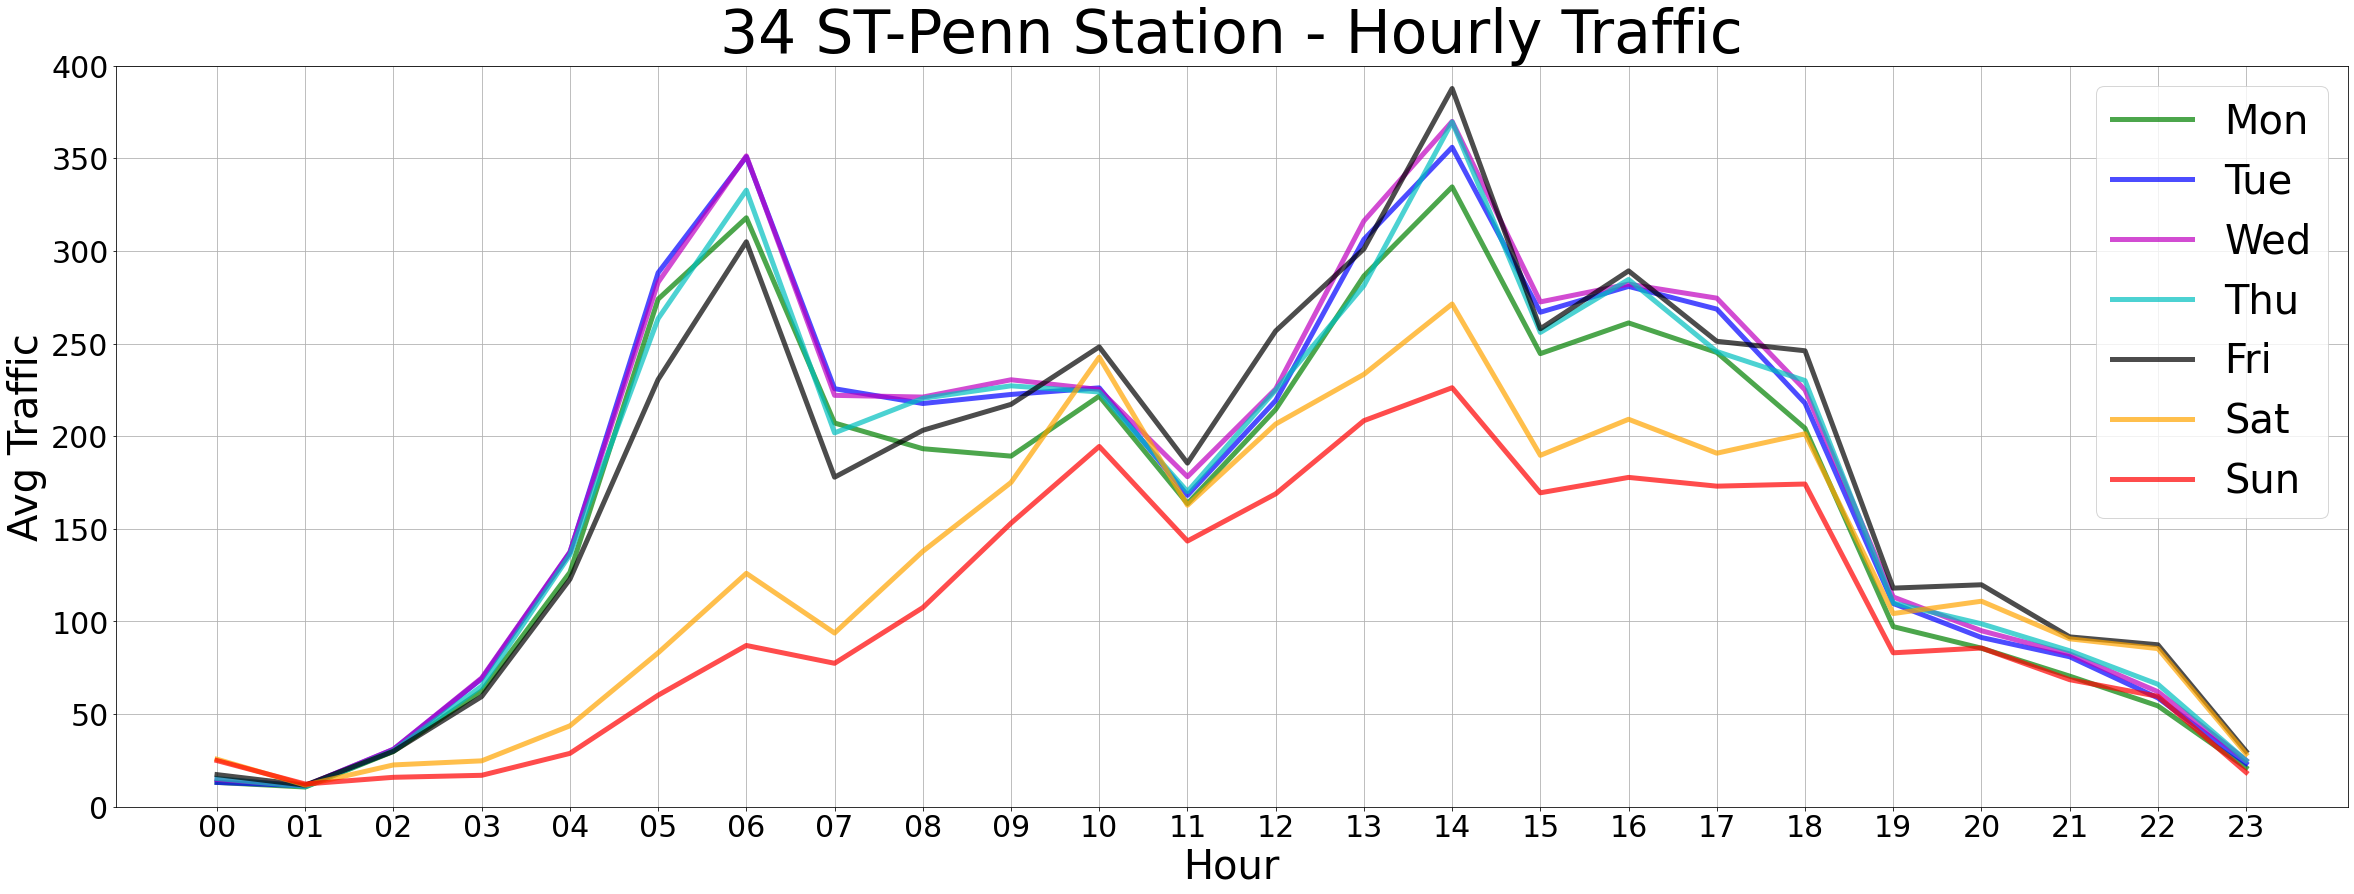

In [27]:
# plot graphs for each day of the week
plt.figure(figsize = (40, 30))

ylimit = 400

weekdays = plt.subplot(2, 1, 1)
plt.plot(mon_penn34.TIME, mon_penn34.DAILY_TRAFFIC, color = 'g', linewidth = 5, alpha = 0.7)
plt.plot(tue_penn34.TIME, tue_penn34.DAILY_TRAFFIC, color = 'b', linewidth = 5, alpha = 0.7)
plt.plot(wed_penn34.TIME, wed_penn34.DAILY_TRAFFIC, color = 'm', linewidth = 5, alpha = 0.7)
plt.plot(thu_penn34.TIME, thu_penn34.DAILY_TRAFFIC, color = 'c', linewidth = 5, alpha = 0.7)
plt.plot(fri_penn34.TIME, fri_penn34.DAILY_TRAFFIC, color = 'k', linewidth = 5, alpha = 0.7)
plt.plot(sat_penn34.TIME, sat_penn34.DAILY_TRAFFIC, color = 'orange', linewidth = 5, alpha = 0.7)
plt.plot(sun_penn34.TIME, sun_penn34.DAILY_TRAFFIC, color = 'r', linewidth = 5, alpha = 0.7)
plt.title('34 ST-Penn Station - Hourly Traffic', fontsize=60, fontweight = 20)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Avg Traffic', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim([0, ylimit])
plt.grid()
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], prop={'size': 40});

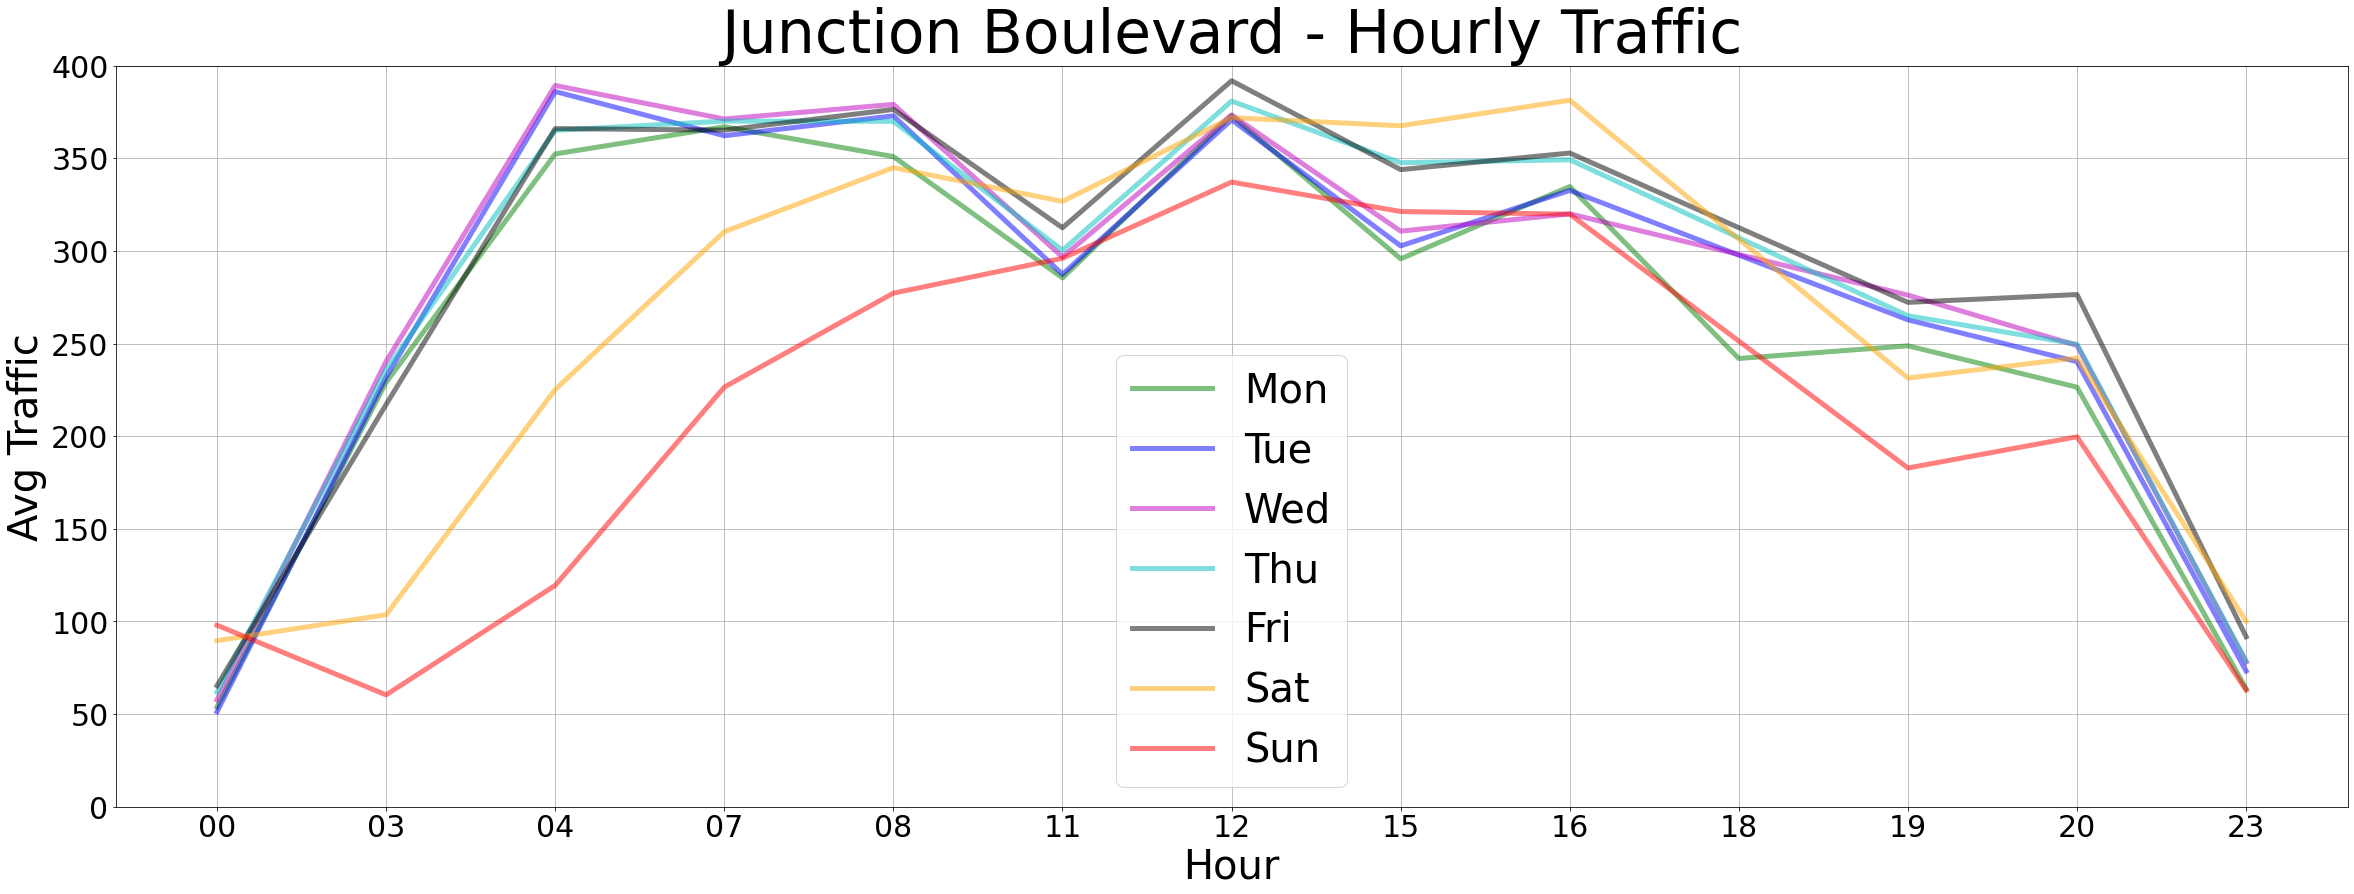

In [28]:
# plot graphs for each day of the week
plt.figure(figsize = (40, 30))

ylimit = 400

weekdays = plt.subplot(2, 1, 1)
plt.plot(mon_juncBlvd.TIME, mon_juncBlvd.DAILY_TRAFFIC, color = 'g', linewidth = 5, alpha = 0.5)
plt.plot(tue_juncBlvd.TIME, tue_juncBlvd.DAILY_TRAFFIC, color = 'b', linewidth = 5, alpha = 0.5)
plt.plot(wed_juncBlvd.TIME, wed_juncBlvd.DAILY_TRAFFIC, color = 'm', linewidth = 5, alpha = 0.5)
plt.plot(thu_juncBlvd.TIME, thu_juncBlvd.DAILY_TRAFFIC, color = 'c', linewidth = 5, alpha = 0.5)
plt.plot(fri_juncBlvd.TIME, fri_juncBlvd.DAILY_TRAFFIC, color = 'k', linewidth = 5, alpha = 0.5)
plt.plot(sat_juncBlvd.TIME, sat_juncBlvd.DAILY_TRAFFIC, color = 'orange', linewidth = 5, alpha = 0.5)
plt.plot(sun_juncBlvd.TIME, sun_juncBlvd.DAILY_TRAFFIC, color = 'r', linewidth = 5, alpha = 0.5)
plt.title('Junction Boulevard - Hourly Traffic', fontsize=60, fontweight = 20)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Avg Traffic', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim([0, ylimit])
plt.grid()
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], prop={'size': 40});